# 01 - Iris 🌺

Today's first exercise is a basic application of the lectures, so that you can get a clear idea of what we just did!

---

![](https://images.unsplash.com/photo-1556057004-af89d3639266?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80)

---

**Q1.** Import the needed libraries.

In [55]:
# TODO: Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA

### ATTENTION: Nous sommes dans la partie non supervisée !!

**Q2.** We are going to reuse the Iris dataset already stored in scikit-learn. Load it in `X` and `y` variables

In [56]:
# TODO: load the Iris dataset from scikit learn
# comme dans le cours
#X, y = datasets.load_iris(return_X_y=True)
#X.shape
# Loading the dataset
iris = datasets.load_iris()
print(f'type(iris): {type(iris)}')

### NB: on charge qd même en X et y car la Dim redux concerne la matrice des features X
X = iris.data
y = iris.target

df = pd.DataFrame(iris.data,columns=iris.feature_names)
print(f'type(df): {type(df)}')

print(type(X)), print(type(y))
print(X.shape), print(y.shape)

print(X[:5,:])
print(y[:5])

print(np.unique(y)) #[0,1,2] ok

type(iris): <class 'sklearn.utils._bunch.Bunch'>
type(df): <class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
[0 1 2]


In [57]:
## null count analysis before modelling to keep check
df.isna().value_counts()

# pas de valeurs nulles

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
False              False             False              False               150
dtype: int64

In [58]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Q3**. Play with the data: make a 3D representation of the dataset with different colors for each class.

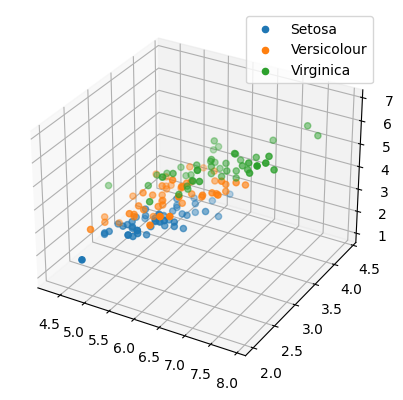

In [59]:
# TODO: Display a 3D representation with different colors for each class of the dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], label='Setosa')
ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2], label='Versicolour')
ax.scatter(X[y==2,0], X[y==2,1], X[y==2,2], label='Virginica')

plt.legend()
plt.show()

# cf ci-dessous pour le graphe interactif

In [60]:
# interactive plot with plotly as in the  webpage
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',color='species', size = 'petal_length')
fig.show()

**Q4.** Let's perform a **PCA** on the data: keep only 2 dimensions instead of 4.

> ⚠️ **Warning**: Do not forget to perform mean normalization on the data first!

In [61]:
# split data in train / test ??? Non car pas dans un cadre supervisé
###from sklearn.model_selection import train_test_split
###X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
# Feature-normalization
# il faut normaliser les features séparément sur train et sur test pour ne pas introduire de Data Leakage
# Pas besoin ici car 
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

##X_train = StandardScaler().fit_transform(X_train)
##X_test = StandardScaler().fit_transform(X_test)c


In [63]:
X[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

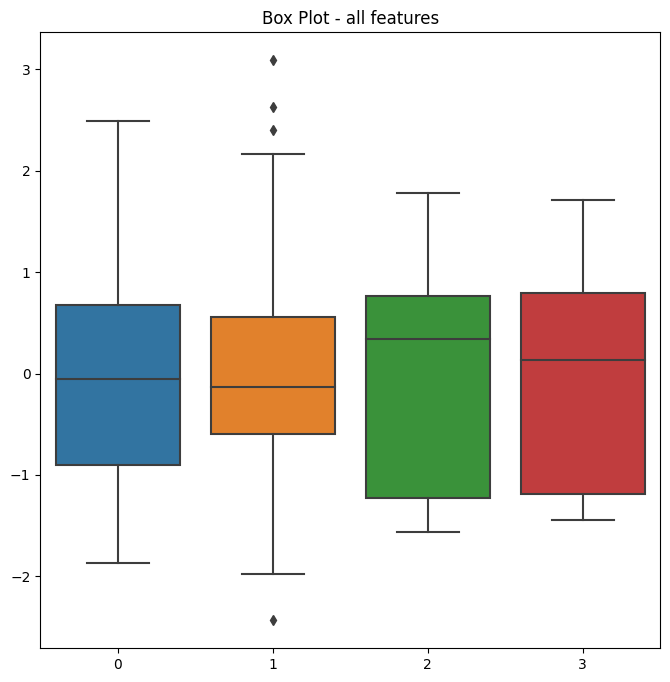

In [64]:
# features boxplots
plt.figure(figsize=(8,8))
plt.title('Box Plot - all features')
sns.boxplot(data=X, notch=False);
plt.show()

# le standardScaler 'centre' les vars


In [65]:
# Normalized Heatmap

In [66]:
# je centre qd même les features malgré le scaling ci-dessus
X_centered = X - X.mean(axis=0)

In [67]:
# TODO: Perform PCA and keep only two dimensions
# from 4 features to o 2 with PCA
# REF: https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset

# PCA avec 2 nouvelles features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

**Q5.** Plot your results on a 2D plot this time, still with a different color for each class.

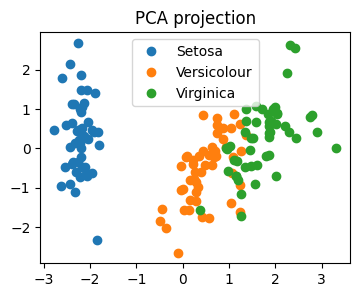

In [68]:
# TODO: plot your results!
# Then we plot the results of PCA
plt.figure(figsize=(4, 3))
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'o', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'o', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'o', label='Virginica')
plt.legend(loc=0)
plt.title('PCA projection')
plt.show() #OK

**Q5.** What is the **total retained variance** of our PCA projection?

In [70]:
# TODO: display the total retained variance
cumulated_var_pca = np.cumsum(pca.explained_variance_ratio_)
cumulated_var_pca

array([0.72962445, 0.95813207])

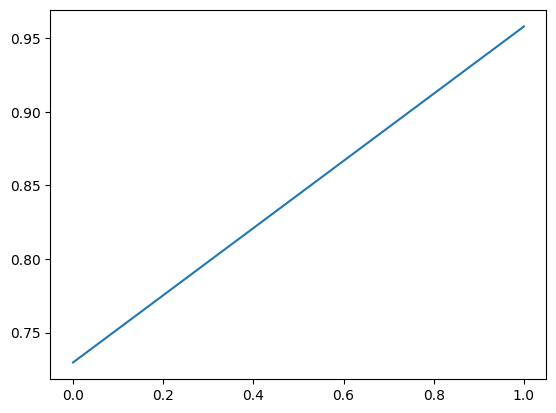

In [71]:
plt.plot(cumulated_var_pca)

**Q6.** Now apply t-SNE algorithm on the data, and plot the result with 2 dimensions kept.

Text(0.5, 1.0, 't-SNE projection')

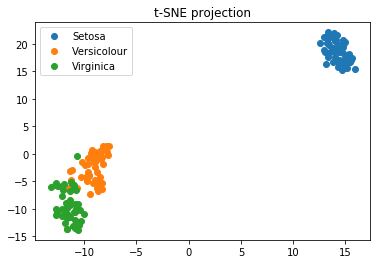

In [14]:
# TODO: t-SNE